# SMOTE (synthetic minority oversampling technique)

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.


It aims to balance class distribution by randomly increasing minority class examples by replicating them.

SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class.
These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

# STEPS

Step 1: Setting the minority class set A, for each $x \in A$, the k-nearest neighbors of x are obtained by calculating the Euclidean distance between x and every other sample in set A.


Step 2: The sampling rate N is set according to the imbalanced proportion. For each $x \in A$, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .


Step 3: For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:
$x' = x + rand(0, 1) * \mid x - x_k \mid$
in which rand(0, 1) represents the random number between 0 and 1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
from sklearn.datasets import make_classification

In [17]:
X,Y = make_classification(n_samples = 1000 , n_features = 2 , n_redundant = 0 , n_classes = 2 , n_clusters_per_class = 1,weights = [0.90],random_state = 1)

In [18]:
df1 = pd.DataFrame(X, columns = ['f1','f2'])
df2 = pd.DataFrame(Y, columns = ['targets'])
final_df = pd.concat([df1 , df2],axis = 1)

In [19]:
final_df

,f1,f2,targets
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [21]:
final_df['targets'].value_counts()

0    894
1    106
Name: targets, dtype: int64

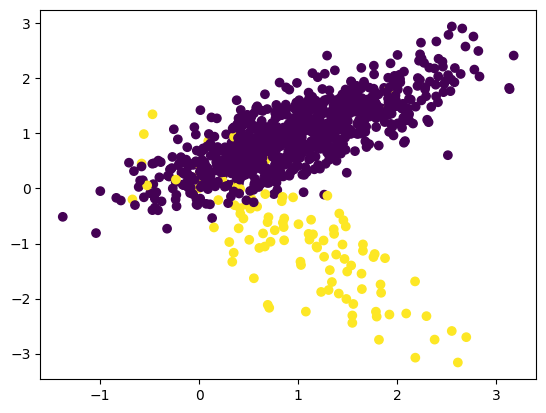

In [24]:
plt.scatter(final_df['f1'],final_df['f2'],c =final_df['targets'])    # purple - 894  , yellow = 106

here purple accuracy is very high  than yellow datapoints   so this is imbalanced dataset 


# UPSAMPLING TECHNIQUE - SMOTE IS USED HERE

In [26]:
from imblearn.over_sampling import SMOTE

In [28]:
over_sample = SMOTE()

In [29]:
X,Y = over_sample.fit_resample(final_df[['f1','f2']],final_df[['targets']])

In [30]:
X.shape

(1788, 2)

In [32]:
Y.shape

(1788, 1)

In [33]:
Y == 0

,targets
0,False
1,True
2,True
3,True
4,True
...,...
1783,False
1784,False
1785,False
1786,False


In [38]:
len(Y[Y==0])

1788

In [39]:
df1 = pd.DataFrame(X,columns = ['f1','f2'])
df2 = pd.DataFrame(Y, columns = ['f1','f2'])
over_sample_df = pd.concat([df1 , df2],axis= 1)

In [40]:
over_sample_df

,f1,f2,f1,f2
0,1.536830,-1.398694,NaN,NaN
1,1.551108,1.810329,NaN,NaN
2,1.293619,1.010946,NaN,NaN
3,1.119889,1.632518,NaN,NaN
4,1.042356,1.121529,NaN,NaN
...,...,...,...,...
1783,0.117491,0.176798,NaN,NaN
1784,1.391976,-1.181388,NaN,NaN
1785,0.948257,-2.212410,NaN,NaN
1786,1.388139,-1.838397,NaN,NaN


In [41]:
over_sample_df.shape

(1788, 4)